In 2014, the paper “Practical Lessons from Predicting Clicks on Ads at Facebook” claimed that **having the right features is the most important thing in developing their ML models**. 

Since then, many of the companies that I’ve worked with have discovered time and time again that once they have a workable model, **having the right features tends to give them the biggest performance boost** compared to clever algorithmic techniques such as
hyperparameter tuning. 

State-of-the-art model architectures can still perform poorly if they don’t use a good set of features.

### 1. Learned Features Versus Engineered Features

The promise of deep learning is that we **won’t have to handcraft features**. For this reason, deep learning is sometimes called **feature learning**. Many features can be automatically learned and extracted by algorithms.

However, we’re still far from the point where all features can be automated. This is not to mention that, as of this writing, the **majority of ML applications in production aren’t deep learning**.

Feature engineering requires knowledge of **domain-specific techniques**.

The process of **choosing what information to use and how to extract this information into a format usable** by your ML models is feature engineering.

### 2. Common Feature Engineering Operations

#### 2.1 Handling Missing Values

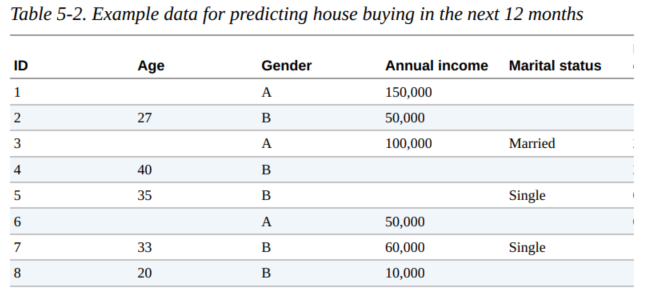

Three types of missing values: 
1. Missing not at random (MNAR)
  - A value is missing is **because of the true value itself**.
  - e.g. Some respondents didn't disclose their income. It may turn out that the income of the respondents who failed to report tends to be higher than that of those who did disclose.
2. Missing at random (MAR)
  - A value is missing is **not due to the value itself, but due to another observed variable**.
  - e.g. Age vaues are often missing for respondents of gender "A", which might be because the people of gender A in this survey don't like disclosing their age.
3. Missing completely at random (MCAR)
  - **No pattern** in when the value is missing.
  - e.g. We might think that the missing values for the column “Job” might be completely random, not because of the job itself and not because of any other variable. People just forget to fill in that value sometimes for no particular reason.
  - This type of missing is **very rare**. There are usually reasons why certain values are missing.

##### Deletion

1. Column deletion
  - If a variable has too many missing values, just remove that variable.
  - e.g. Over 50% of the values for the variable “Marital status” are missing, so you might be tempted to remove this variable from your model. Marital status might be highly correlated to buying houses, as married couples are much more likely to be homeowners than single people.
  - Drawback: might **remove important information** and reduce the accuracy of your model.
2. Row deletion
  - If a sample has missing value(s), just remove that sample.
  - This method can work when the **missing values** are **MCAR** and the **number of examples with missing values is small**, such as less than 0.1%.
  - You don't want to do row deletion if that means 10% of your data samples are removed.
  - However, removing rows of data can also **remove important information** that your model needs to make predictions, especially if the **missing values are not MNAR**.
  - Removing rows of data can **create biases** in your model, especially if the **missing values are MAR**.

##### Imputation

1. Fill in missing values with their defaults
  - e.g. if the job is missing, you might fill it with an empty string “”. 
2. Fill in missing values with the mean, median, or mode
  - e.g. if the temperature value is missing for a data sample whose month value is July, it’s not a bad idea to fill it with the median temperature of July.

In general, you want to **avoid filling missing values with possible values**, such as filling the missing number of children with 0—0 is a possible value for the number of children. It makes it hard to distinguish between people whose information is missing and people who don’t have children.

Multiple techniques might be used at the same time or in sequence to handle missing values for a particular set of data. Regardless of what techniques you use, one thing is certain: **there is no perfect way to handle missing values**. 

With **deletion**, you risk **losing important information** or **accentuating biases**. 

With **imputation**, you risk injecting your own bias into and **adding noise** to your data, or worse, **data leakage**. 

#### 2.2 Scaling

**Feature scaling**: before inputting features into models, scale them to be similar ranges.

1. Range $[0,1]$
$$x^{'} = \frac{x - \min{(x)}}{\max{(x)} - \min{(x)}}$$

2. Range $[a,b]$, e.g. range $[-1,1]$
- Don't want to make any assumptions about your variables.
$$x^{'} = a + \frac{[x - \min{(x)}](b-a)}{\max{(x)} - \min{(x)}}$$

3. Standardization
- Variables might follow a normal distribution.
- Helpful to normalize them so that they have **zero mean and unit variance**.
$$x^{'} = \frac{x-\bar{x}}{\sigma}$$

4. Log transformation
- To help mitigate the skewness of features.
- Can yield performace gain in many cases, it doesn't work for all cases.
- Should be wary of the **analysis performed on log-transformed data** instead of the original data.

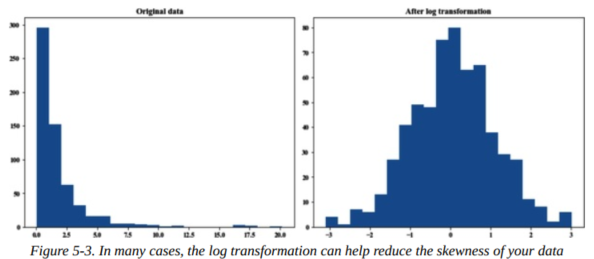

Things to note about scaling:
1. Common source of data leakage
2. Often requires global statistics
    - You have to look at the entire or a subset of training data to calculate its min, max, or mean.
    - During **inference**, you **reuse the statistics** you had obtained during training to scale new data.
    - If the new **data has changed significantly** compared to the training, these **statistics won’t be very useful**.

#### 2.3 Discretization

Discretization is the process of turning **continuous feature into a discrete feature**.
- a.k.a. **quantization** or **binning**.

e.g. Annual income:
- Lower income: less than $35,000/year
- Middle income: between $35,000 and $100,000/year
- Upper income: more than $100,000/year

It can be used for **discrete features** too.

e.g. Age:
- Less than 18
- Between 18 and 22
- Between 22 and 30
- Between 30 and 40
- Between 40 and 65
- Over 65

Downside: introduces **discontinuities at the category boundaries**
- e.g. $34,999 is now treated as completely different from $35,000, which is treated the same as $100,000.

#### 2.4 Encoding Categorical Features

People who haven’t worked with data in production tend to assume that **categories are static**, which means the categories don’t change over time. 

However, in production, **categories change**. 

Hashing trick:
- Popularized by the package **Vowpal Wabbit** developed at Microsoft.
- Use a **hash function** to generate a hashed value fo **each category**.
- The **hashed value** will become the **index** of that category.
- Because you can **specify the hash space**, you can **fix the number of encoded values** for a feature in advance, **without having to know how many categories** there will be. 
- **Collision**: two categories being assigned the same index. The collisions are random.

In research done by Booking.com, even for 50% colliding features, the performance loss is less than 0.5%.

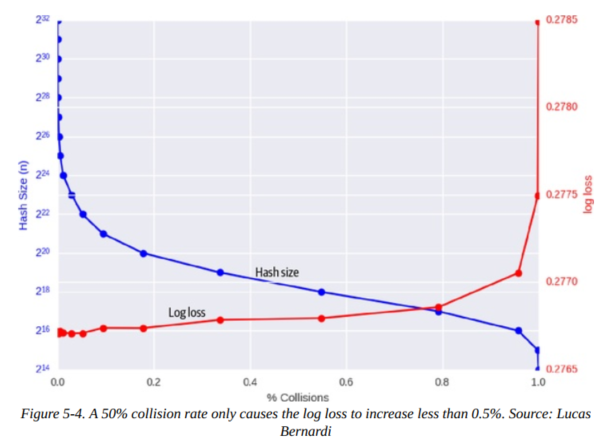

You can choose a **hash space large enough to reduce the collision**. 

You can also choose a hash function with properties that you want, such as a **locality-sensitive** hashing function where similar categories (such as websites with similar names) are hashed into values close to each other.

#### 2.5 Feature Crossing

- Feature crossing is the technique to **combine two or more features to generate new features**. 
- Useful to **model the nonlinear relationships between features**.
- Essential for models that **can’t learn or are bad at learning nonlinear relationships**, such as linear regression, logistic regression, and tree-based models.
- **Less important in neural networks**, but it can still be useful because **explicit feature crossing occasionally helps neural networks learn nonlinear relationships faster**.

e.g. for the task of predicting whether someone will  want to buy a house in the next 12 months, you suspect that there might be a nonlinear relationship between marital status and number of children, so you combine them to create a new feature “marriage and children”.

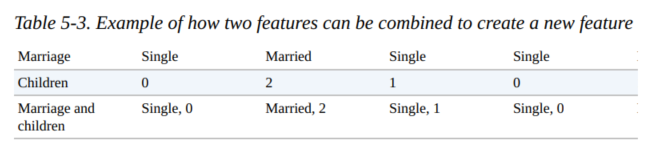

Caveat:
1. It can make your **feature space blow up**.
- e.g. Feature A has 100 possible values and feature B has 100 possible features; crossing these two features will result in a feature with 100 × 100 = 10,000 possible values
2. Increases the number of features models use, it can make models **overfit** to the training data.

#### 2.6 Discrete and Continuous Positional Embeddings

**RNN**: process words in **sequential order**, which means **the order of words is implicitly inputted**. 

**Transformer**: process words in **parallel**, so words’ positions need to be **explicitly inputted** so that our model knows the order of these words.

**Word embedding**: use an embedding matrix with the vocabulary size as its number of columns, and each column is the embedding for
the word at the index of that column.

**Position embedding**: the number of columns is the number of positions.

The embedding size for positions is usually the **same** as the embedding size for words so that they **can be summed**. 

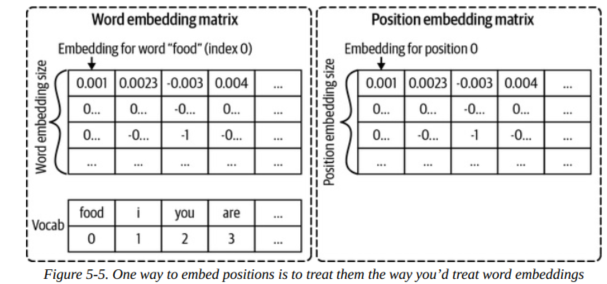

Position embeddings can also be **fixed**. The embedding for each position is still a vector with S elements (S is the position embedding size), but each element is predefined using a function, usually **sine and cosine**. 

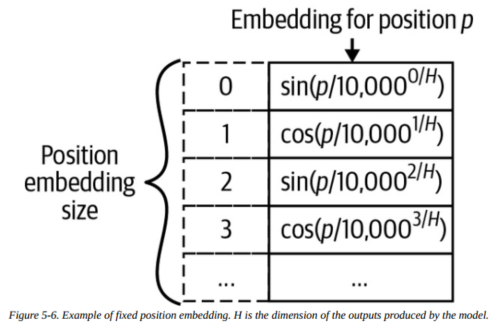

**Fixed positional embedding** is a special case of what is known as **Fourier features**. 
- If **positions** in positional embeddings are **discrete**, **Fourier features** can also be **continuous**.
-  When **positions** are **continuous**, it’d be very hard to build an embedding matrix with continuous column indices, but **fixed position embeddings using sine and cosine functions still work**.

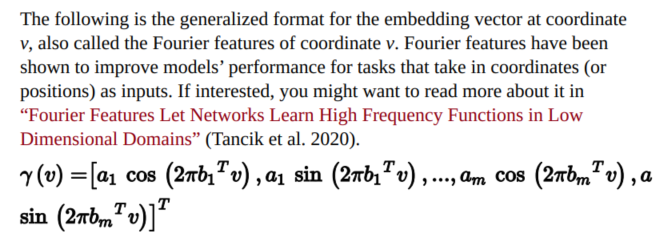

### 3. Data Leakage

The phenomenon when a **form of the label "leaks"** into the set of **features used for making predictions**, and this same information is **not available during inference**. 

#### 3.1 Common Causes for Data Leakage

##### Splitting time-correlated data randomly instead of by time

Case study:
- The prices of similar stocks tend to move together. If 90% of the tech stocks go down today, it’s very likely the other 10% of the tech stocks go down too. 
- When building models to predict the future stock prices, you want to split your training data by time, such as training your model on data from the first six days and evaluating it on data from the seventh day. 
- If you randomly split your data, prices from the seventh day will be included in your train split and leak into your model the condition of the market on that day. 
- We say that the **information from the future is leaked into the training process**.

To prevent future information from leaking into the training process and allowing models to cheat during evaluation, **split your data by time, instead of splitting randomly**, whenever possible. 

If you have data from five weeks, use the first four weeks for the train split, then randomly split week 5 into validation and test splits.

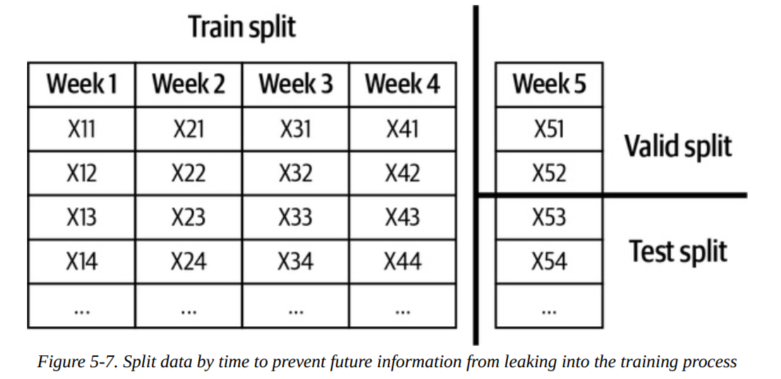

##### Scaling before splitting

Common mistake:
- Use the **entire training data** to generate **global statistics before splitting** it into different splits.
- Leaking the **mean and variance of the test samples** into the training process.
- Allowing a model to adjust its predictions for the test samples.

**Split your data first before scaling**, then use the statistics from the train split to scale all the splits. 

Some even suggest that we **split our data before any exploratory data analysis and data processing**, so that we don’t accidentally gain information about the test split.

##### Filling in missing data with statistics from the test split

Common mistake: mean or median is calculated using entire data instead of just the train split.

Prevented by using only **statistics from the train split** to fill in missing values in all the splits.

##### Poor handling of data duplication before splitting

If you have duplicates or near-duplicates in your data, **failing to remove** them **before splitting** your data might cause the **same samples to appear in both train and validation/test splits**. 

Reasons of data duplication:
1. Data collection or merging different data sources.
    - e.g. one dataset combined several other datasets without realizing that one of the component datasets already contains another component.
2. Data processing.
    - e.g. oversampling might result in duplicating certain examples.

##### Group leakage

A group of examples have **strongly correlated labels** but are **divided into different splits**.

Examples: 
1. A patient might have two lung CT scans that are a week apart, which likely have the same labels on whether they contain signs of lung cancer, but one of them is in the train split and the second is in the test split.
2. Objective detection tasks that contain photos of the same object taken milliseconds apart—some of them landed in the train split while others landed in the test split.

##### Leakage from data generation process

Case study:
- Suppose you want to build an ML model to predict whether a CT scan of a lung shows signs of cancer. 
- You obtained the data from hospital A, removed the doctors’ diagnosis from the data, and trained your model. 
- It did really well on the test data from hospital A, but poorly on the data from hospital B.
- After extensive investigation, you learned that at hospital A, when doctors think that a patient has lung cancer, they send that patient to a more advanced scan machine, which outputs slightly different CT scan images. 
- Your model learned to **rely on the information on the scan machine used to make predictions** on whether a scan image shows signs of lung cancer. 
- Hospital B sends the patients to different CT scan machines at random, so your model has no information to rely on. 

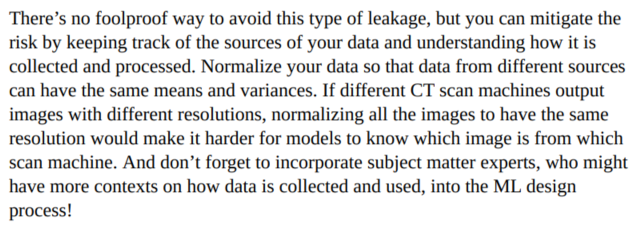

#### 3.2 Detecting Data Leakage

Data leakage can happen during many steps, from generating, collecting, sampling, splitting, and processing data to feature engineering. It’s important to monitor for data leakage during the entire lifecycle of an ML project.

Measure the predictive power of each feature or a set of features with respect to the target variable (label). If a feature has unusually **high correlation**, investigate how this feature is generated and whether the correlation makes sense. 

Do **ablation studies** to measure how important a feature or a set of features is to your model. If removing a feature causes the model’s performance to deteriorate significantly, investigate why that feature is so important. If you have a massive amount of features, say a thousand features, it might be infeasible to do ablation studies on every possible combination of them, but it can still be useful to occasionally do ablation studies with a subset of features that you suspect the most. 

Keep an eye out for new features added to your model. If adding a new feature significantly improves your model’s performance, **either that feature is really good or that feature just contains leaked information about labels**.

Be very careful every time you look at the test split. If you **use the test split in any way other than to report a model’s final performance**, whether to come up with ideas for new features or to tune hyperparameters, you **risk leaking information from the future** into your training process.

### 4. Engineering Good Features

Generally, adding more features leads to better model performance. 

However, more features doesn’t always mean better model performance:
- More opportunities there are for **data leakage**.
- Can cause **overfitting**.
- Can **increase memory** required to serve a model, which,in turn, might require you to use a more expensive machine/instance to serve your model.
- Can increase **inference latency** when doing online prediction, especially if you need to extract these features from raw data for predictions online. 
- **Useless features** become **technical debts**. Whenever your data pipeline changes, all the affected features need to be adjusted accordingly. 
  - If one day your application decides to no longer take in information about users’ age, all features that use users’ age need to be updated.

In theory, if a feature doesn’t help a model make good predictions, regularization techniques like **L1 regularization should reduce that feature’s weight to 0**.

In practice, it might help models **learn faster** if the **features that are no longer useful (and even possibly harmful) are removed**, prioritizing good features.

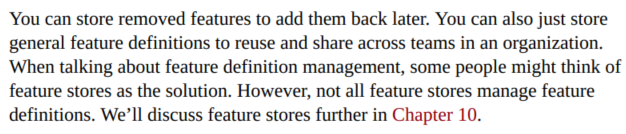

Two factors you might want to consider when evaluating whether a feature is good for a model:
1. Importance to the model
2. Generalization to unseen data

#### 4.1 Feature Importance

Intuitively, a feature’s importance to a model is measured by ***how much that model’s performance deteriorates if that feature or a set of features containing that feature is removed from the model**.

Feature importance techniques are also **great for interpretability as they help you understand how your models work under the hood**.

If you use a classical ML algorithm like **boosted gradient trees**, the easiest way to measure the importance of your features is to use **built-in feature importance functions** implemented by XGBoost.

For more **model-agnostic methods**, you might want to look into **SHAP (SHapley Additive exPlanations)**.
- **InterpretML** is a great open source package that leverages feature importance to help you understand how your model makes predictions.
- SHAP not only measures a feature’s importance to an entire model, it also measures each feature’s contribution to a model’s specific prediction.

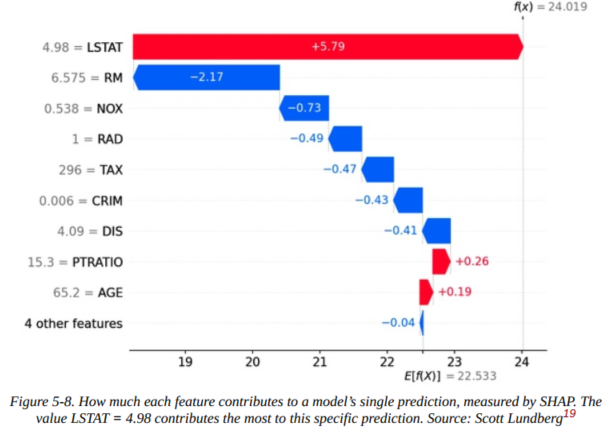

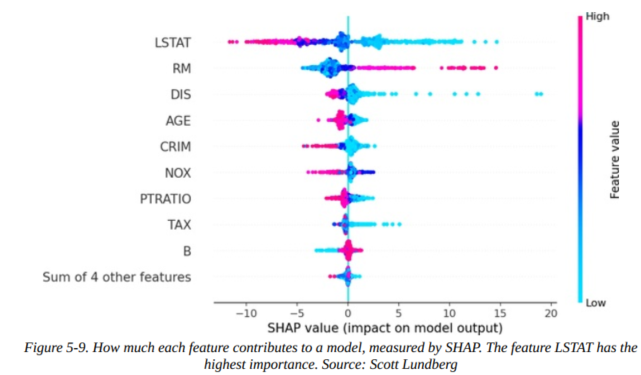

Often, **a small number of features accounts for a large portion of your model’s feature importance**.

When measuring feature importance for a click-through rate prediction model, the ads team at Facebook found out that the top 10 features are responsible for about half of the model’s total feature importance, whereas the last 300 features contribute less than 1% feature importance.

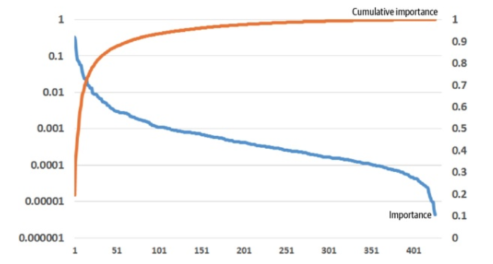

#### 4.2 Feature Generalization

Features used for the model should generalize to unseen data. **Not all features generalize equally**. 

Two aspects to consider with regards to generalization:
1. Feature coverage
  - **Percentage of the samples that has values for this feature in the data**—so the fewer values that are missing, the higher the coverage.
  - **Rough rule of thumb**: if this feature appears in a very small percentage of your data, it’s not going to be very generalizable. 
    - e.g. if you want to build a model to predict whether someone will buy a house in the next 12 months and you think that the number of children someone has will be a good feature, but you can only get this information for 1% of your data, this feature might not be very useful.
  - This rule of thumb is rough because some **features can still be useful even if they are missing** in most of your data. This is especially true when the **missing values are not at random**, which means having the feature or not might be a strong indication of its value.
    -  e.g. if a feature appears only in 1% of your data, but 99% of the examples with this feature have POSITIVE labels, this feature is useful and you should use it.
  - Coverage of a feature can **differ wildly** between **different slices of data** and even in the **same slice of data over time**. 
    - e.g. if the coverage of a feature differs a lot between the train and test split (such as it appears in 90% of the examples in the train split but only in 20% of the examples in the test split), this is an indication that your train and test splits don’t come from the same distribution. 
2. Distribution of feature values
  -  If the set of values that appears in the seen data (such as the train split) **has no overlap** with the set of values that appears in the unseen data (such as the test split), this **feature might even hurt your model’s performance**.

  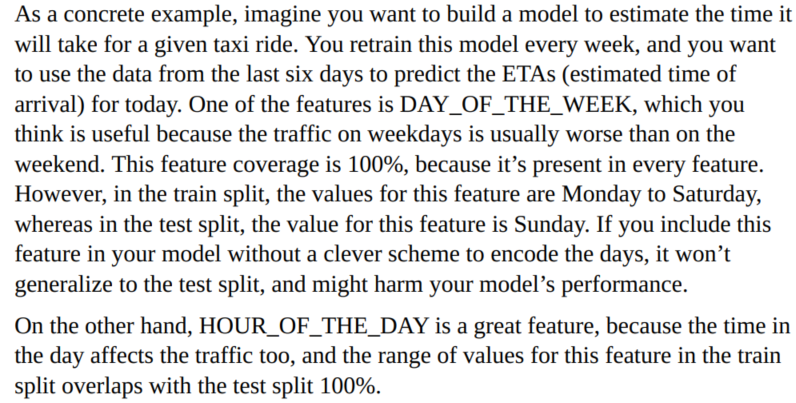

When considering a feature’s generalization, there’s a **trade-off between generalization and specificity**.

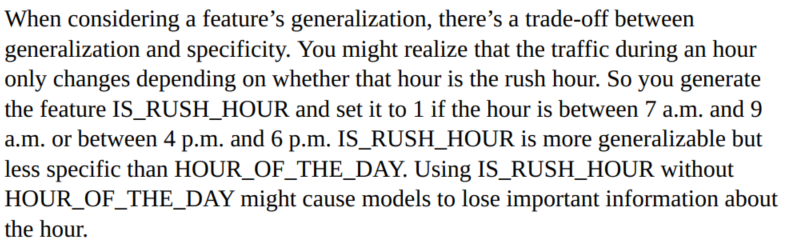